In [278]:
#Importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [279]:
daily_activity_0 = pd.read_csv(r"C:\Users\yasar\OneDrive\Desktop\Projects\case study2\data\mturkfitbit_export_3.12.16-4.11.16\Fitabase Data 3.12.16-4.11.16\dailyActivity_merged.csv")
daily_activity_1 = pd.read_csv(r"C:\Users\yasar\OneDrive\Desktop\Projects\case study2\data\mturkfitbit_export_4.12.16-5.12.16\Fitabase Data 4.12.16-5.12.16\dailyActivity_merged.csv")

In [280]:
merged_daily_activity = pd.concat([daily_activity_0, daily_activity_1], axis = 0) 

In [281]:
merged_daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1397 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        1397 non-null   int64  
 1   ActivityDate              1397 non-null   object 
 2   TotalSteps                1397 non-null   int64  
 3   TotalDistance             1397 non-null   float64
 4   TrackerDistance           1397 non-null   float64
 5   LoggedActivitiesDistance  1397 non-null   float64
 6   VeryActiveDistance        1397 non-null   float64
 7   ModeratelyActiveDistance  1397 non-null   float64
 8   LightActiveDistance       1397 non-null   float64
 9   SedentaryActiveDistance   1397 non-null   float64
 10  VeryActiveMinutes         1397 non-null   int64  
 11  FairlyActiveMinutes       1397 non-null   int64  
 12  LightlyActiveMinutes      1397 non-null   int64  
 13  SedentaryMinutes          1397 non-null   int64  
 14  Calories 

In [282]:
#Converting ActivityDate to Date format
merged_daily_activity['ActivityDate'] = pd.to_datetime(merged_daily_activity['ActivityDate'])

#Converting Id to String format
merged_daily_activity['Id'] = merged_daily_activity['Id'].astype(str)

In [284]:
merged_daily_activity['day'] = merged_daily_activity['ActivityDate'].dt.day_name()
merged_daily_activity['ActiveMinutes'] = merged_daily_activity['VeryActiveMinutes']+merged_daily_activity['FairlyActiveMinutes']+merged_daily_activity['LightlyActiveMinutes']

In [285]:
merged_daily_activity.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories', 'day',
       'ActiveMinutes'],
      dtype='object')

In [287]:
total_daily_activity = merged_daily_activity[['Id', 'ActivityDate', 'day', 'TotalSteps', 'TotalDistance', 'SedentaryMinutes', 'Calories', 
                                               'ActiveMinutes']]

In [288]:
total_daily_activity.head()

,Id,ActivityDate,day,TotalSteps,TotalDistance,SedentaryMinutes,Calories,ActiveMinutes
0,1503960366,2016-03-25,Friday,11004,7.11,804,1819,250
1,1503960366,2016-03-26,Saturday,17609,11.55,588,2154,380
2,1503960366,2016-03-27,Sunday,12736,8.53,605,1944,329
3,1503960366,2016-03-28,Monday,13231,8.93,1080,1932,283
4,1503960366,2016-03-29,Tuesday,12041,7.85,763,1886,299


In [289]:
total_daily_activity.describe()

,TotalSteps,TotalDistance,SedentaryMinutes,Calories,ActiveMinutes
count,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000
mean,7280.898354,5.219434,992.542591,2266.265569,218.455261
std,5214.336113,3.994206,313.297376,753.005527,128.748674
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3146.000000,2.170000,729.000000,1799.000000,125.000000
50%,6999.000000,4.950000,1057.000000,2114.000000,242.000000
75%,10544.000000,7.500000,1244.000000,2770.000000,313.000000
max,36019.000000,28.030001,1440.000000,4900.000000,720.000000


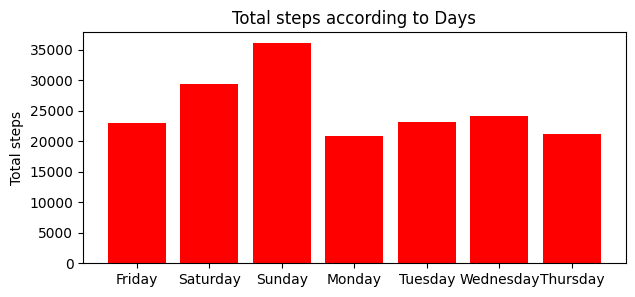

In [394]:
plt.figure(figsize=(7, 3))
plt.bar(total_daily_activity['day'], total_daily_activity['TotalSteps'], color = 'red')
plt.title("Total steps according to Days")
plt.ylabel("Total steps")
plt.show()

maximum steps are on sunday as people have holidays and least steps on monday and thursday as monday is first 
working day of week. The devices can set monday challenge for steps.

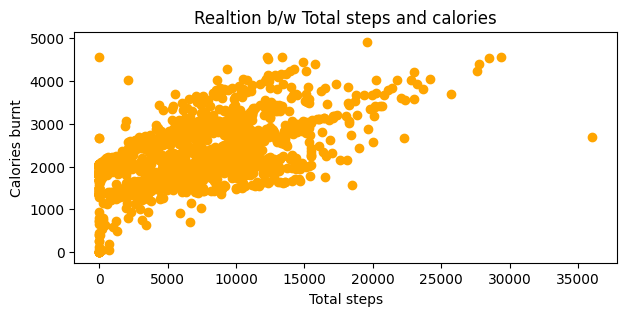

In [395]:
plt.figure(figsize=(7, 3))
plt.scatter(total_daily_activity['TotalSteps'], total_daily_activity['Calories'], c= 'orange')
plt.title("Realtion b/w Total steps and calories")
plt.xlabel("Total steps")
plt.ylabel("Calories burnt")
plt.show()

In [299]:
day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sedentary_minutes = []
very_active_min = []
fairly_active_min = []
lightly_active_min = []

In [304]:
for i in day:
    sedentary_minutes.append(merged_daily_activity[merged_daily_activity['day'] == i]['SedentaryMinutes'].sum())
    very_active_min.append(merged_daily_activity[merged_daily_activity['day'] == i]['VeryActiveMinutes'].sum())
    fairly_active_min.append(merged_daily_activity[merged_daily_activity['day'] == i]['FairlyActiveMinutes'].sum())
    lightly_active_min.append(merged_daily_activity[merged_daily_activity['day'] == i]['LightlyActiveMinutes'].sum())

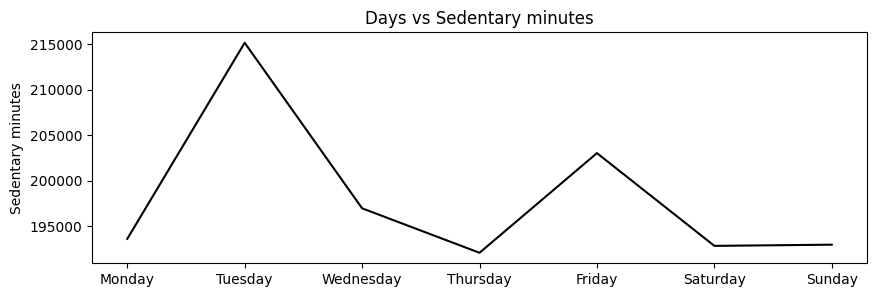

In [396]:
fig = plt.subplots(figsize = (10, 3))
plt.plot(day, sedentary_minutes, color = 'black')
plt.title("Days vs Sedentary minutes")
plt.ylabel("Sedentary minutes")
plt.show()

As we can see in the above plot it shows that tuesday has highest sedentary minutesand thursday has least sedentary minutes.

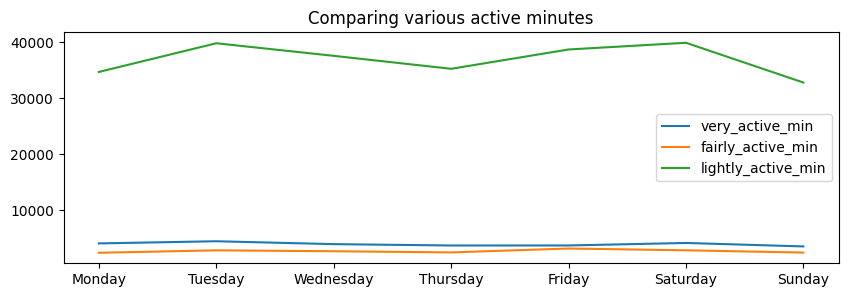

In [340]:
plt.figure(figsize=(10, 3))
plt.plot(day, very_active_min, label = "very_active_min")
plt.plot(day, fairly_active_min, label = "fairly_active_min")
plt.plot(day, lightly_active_min, label = "lightly_active_min")
plt.legend()
plt.title("Comparing various active minutes")
plt.show()

# Sleep

In [341]:
sleep_data = pd.read_csv(r"C:\Users\yasar\OneDrive\Desktop\Projects\case study2\data\mturkfitbit_export_4.12.16-5.12.16\Fitabase Data 4.12.16-5.12.16\sleepDay_merged.csv")

In [342]:
sleep_data.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [343]:
sleep_data['SleepDay'] = pd.to_datetime(sleep_data['SleepDay'])
sleep_data['day'] = sleep_data['SleepDay'].dt.day_name()

In [344]:
sleep_data['ActivityDate'] = sleep_data['SleepDay']

In [345]:
sleep_data.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,day,ActivityDate
0,1503960366,2016-04-12,1,327,346,Tuesday,2016-04-12
1,1503960366,2016-04-13,2,384,407,Wednesday,2016-04-13
2,1503960366,2016-04-15,1,412,442,Friday,2016-04-15
3,1503960366,2016-04-16,2,340,367,Saturday,2016-04-16
4,1503960366,2016-04-17,1,700,712,Sunday,2016-04-17


In [346]:
sleep_data['Hours_asleep'] = sleep_data['TotalMinutesAsleep']/60

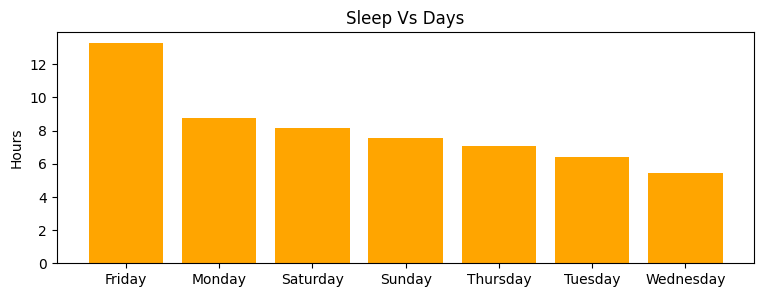

In [397]:
plt.figure(figsize=(9, 3))
plt.bar(sleep_data['day'].sort_values(), sleep_data['Hours_asleep'].sort_values(ascending = False), color = 'orange')
plt.title("Sleep Vs Days")
plt.ylabel('Hours')
plt.show()

As we can see people sleep less on wednesday compared to other days and highest on friday as it is last working day.If sleep is less than 7 hour per day we can send a notification to his device saying that he has less sleep and recommend him to sleep for this many minutes.

In [348]:
sleep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  413 non-null    int64         
 1   SleepDay            413 non-null    datetime64[ns]
 2   TotalSleepRecords   413 non-null    int64         
 3   TotalMinutesAsleep  413 non-null    int64         
 4   TotalTimeInBed      413 non-null    int64         
 5   day                 413 non-null    object        
 6   ActivityDate        413 non-null    datetime64[ns]
 7   Hours_asleep        413 non-null    float64       
dtypes: datetime64[ns](2), float64(1), int64(4), object(1)
memory usage: 25.9+ KB


In [353]:
sleep_data['Id'] = sleep_data['Id'].astype(str)

#Merging the daily activity data and sleep data
sleep_activity = pd.merge(total_daily_activity, sleep_data, on=['Id', 'ActivityDate'])

In [354]:
sleep_activity.head()

,Id,ActivityDate,day_x,TotalSteps,TotalDistance,SedentaryMinutes,Calories,ActiveMinutes,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,day_y,Hours_asleep
0,1503960366,2016-04-12,Tuesday,224,0.14,32,50,9,2016-04-12,1,327,346,Tuesday,5.450000
1,1503960366,2016-04-12,Tuesday,13162,8.50,728,1985,366,2016-04-12,1,327,346,Tuesday,5.450000
2,1927972279,2016-04-12,Tuesday,24,0.02,161,942,3,2016-04-12,3,750,775,Tuesday,12.500000
3,1927972279,2016-04-12,Tuesday,678,0.47,734,2220,55,2016-04-12,3,750,775,Tuesday,12.500000
4,2026352035,2016-04-12,Tuesday,1019,0.63,223,600,64,2016-04-12,1,503,546,Tuesday,8.383333


In [355]:
sleep_activity.drop(['day_x', 'TotalSleepRecords', 'SleepDay'],axis = 1, inplace = True)
sleep_activity['Day'] = sleep_activity['day_y']

In [356]:
sleep_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,SedentaryMinutes,Calories,ActiveMinutes,TotalMinutesAsleep,TotalTimeInBed,day_y,Hours_asleep,Day
0,1503960366,2016-04-12,224,0.14,32,50,9,327,346,Tuesday,5.450000,Tuesday
1,1503960366,2016-04-12,13162,8.50,728,1985,366,327,346,Tuesday,5.450000,Tuesday
2,1927972279,2016-04-12,24,0.02,161,942,3,750,775,Tuesday,12.500000,Tuesday
3,1927972279,2016-04-12,678,0.47,734,2220,55,750,775,Tuesday,12.500000,Tuesday
4,2026352035,2016-04-12,1019,0.63,223,600,64,503,546,Tuesday,8.383333,Tuesday


In [357]:
#Finding how much difference of time between time in bed and minutes asleep

sleep_activity['bed_sleep_diff'] = sleep_activity['TotalTimeInBed'] - sleep_activity['TotalMinutesAsleep']

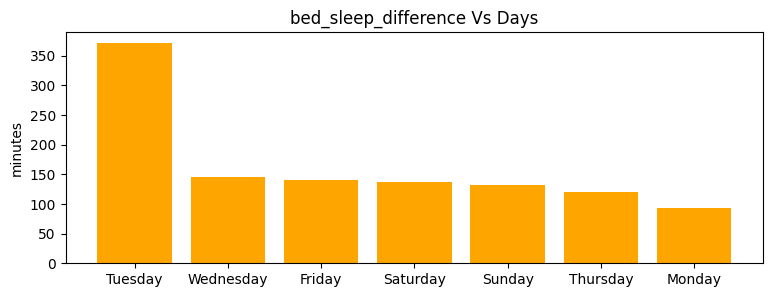

In [408]:
plt.figure(figsize=(9, 3))
plt.bar(sleep_activity['day_y'], sleep_activity['bed_sleep_diff'].sort_values(ascending = False), color = 'orange')
plt.title("bed_sleep_difference Vs Days")
plt.ylabel('minutes')
plt.show()

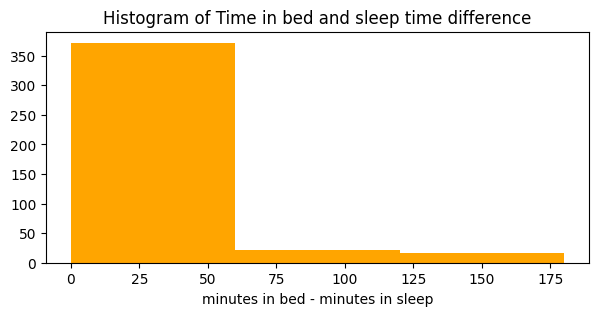

In [399]:
plt.figure(figsize=(7, 3))
plt.hist(merged_sleep_activity['bed_sleep_diff'], bins = [0, 60, 120, 180], color = 'orange')
plt.title("Histogram of Time in bed and sleep time difference")
plt.xlabel("minutes in bed - minutes in sleep")
plt.show()

Maximum people spend less than 60 minutes on bed without sleeping

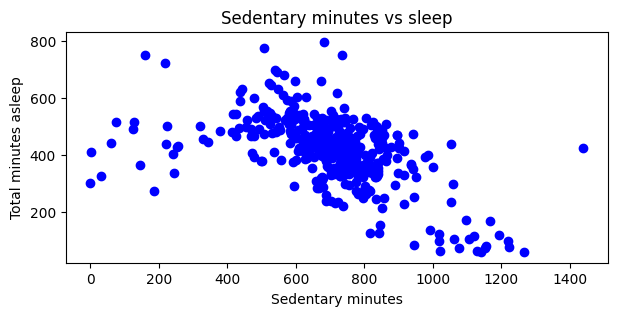

In [402]:
plt.figure(figsize=(7, 3))
plt.scatter(merged_sleep_activity['SedentaryMinutes'], merged_sleep_activity['TotalMinutesAsleep'], color = 'blue')
plt.title("Sedentary minutes vs sleep")
plt.xlabel("Sedentary minutes")
plt.ylabel("Total minutes asleep")
plt.show()

Sedentary minutes and minutes asleep has negative correletion that indicates as sedentary minutes increases total sleep decreases and the correlation coefficient is -0.5293247521458632

# Weights

In [363]:
weights_0 = pd.read_csv(r"C:\Users\yasar\OneDrive\Desktop\Projects\case study2\data\mturkfitbit_export_3.12.16-4.11.16\Fitabase Data 3.12.16-4.11.16\weightLogInfo_merged.csv")
weights_1 = pd.read_csv(r"C:\Users\yasar\OneDrive\Desktop\Projects\case study2\data\mturkfitbit_export_4.12.16-5.12.16\Fitabase Data 4.12.16-5.12.16\weightLogInfo_merged.csv")

In [364]:
merged_weights = pd.concat([weights_0, weights_1], axis = 0)

In [365]:
merged_weights.shape

(100, 8)

In [366]:
merged_weights.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,4/5/2016 11:59:59 PM,53.299999,117.506384,22.0,22.969999,True,1459900799000
1,1927972279,4/10/2016 6:33:26 PM,129.600006,285.719105,NaN,46.169998,False,1460313206000
2,2347167796,4/3/2016 11:59:59 PM,63.400002,139.773078,10.0,24.770000,True,1459727999000
3,2873212765,4/6/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1459987199000
4,2873212765,4/7/2016 11:59:59 PM,57.200001,126.104416,NaN,21.650000,True,1460073599000


In [367]:
merged_weights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              100 non-null    int64  
 1   Date            100 non-null    object 
 2   WeightKg        100 non-null    float64
 3   WeightPounds    100 non-null    float64
 4   Fat             4 non-null      float64
 5   BMI             100 non-null    float64
 6   IsManualReport  100 non-null    bool   
 7   LogId           100 non-null    int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 6.3+ KB


In [373]:
merged_weights['Id'] = merged_weights['Id'].astype(str) 
merged_weights['ActivityDate'] = pd.to_datetime(merged_weights['Date']).dt.date
merged_weights['ActivityDate'] = pd.to_datetime(merged_weights['ActivityDate'])

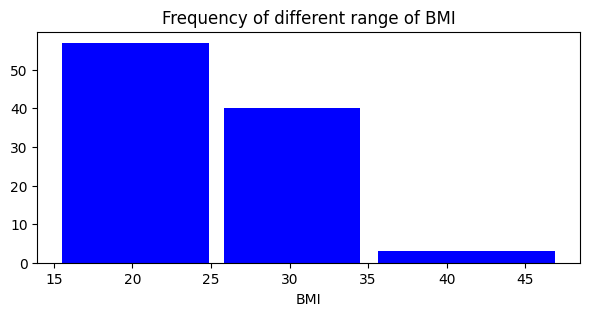

In [403]:
plt.figure(figsize=(7, 3))
plt.hist(merged_weights['BMI'], bins = [15, merged_weights['BMI'].mean(), 35, merged_weights['BMI'].max()],
         rwidth = 0.9, stacked = True, color = 'blue')
plt.title("Frequency of different range of BMI")
plt.xlabel("BMI")
plt.show()

If the BMI is above 25 it indicates that the person is overweight.

# Intensities

In [387]:
intensity_0 = pd.read_csv(r"C:\Users\yasar\OneDrive\Desktop\Projects\case study2\data\mturkfitbit_export_3.12.16-4.11.16\Fitabase Data 3.12.16-4.11.16\hourlyIntensities_merged.csv")
intensity_1 = pd.read_csv(r"C:\Users\yasar\OneDrive\Desktop\Projects\case study2\data\mturkfitbit_export_4.12.16-5.12.16\Fitabase Data 4.12.16-5.12.16\hourlyIntensities_merged.csv")

In [388]:
intensity = pd.concat([intensity_0, intensity_1], axis = 0)
intensity['Id'] = intensity['Id'].astype(str)
intensity['ActivityHour'] = pd.to_datetime(intensity['ActivityHour'])
intensity['time'] = intensity['ActivityHour'].dt.time

In [389]:
intensity.head()

,Id,ActivityHour,TotalIntensity,AverageIntensity,time
0,1503960366,2016-03-12 00:00:00,0,0.0,00:00:00
1,1503960366,2016-03-12 01:00:00,0,0.0,01:00:00
2,1503960366,2016-03-12 02:00:00,0,0.0,02:00:00
3,1503960366,2016-03-12 03:00:00,0,0.0,03:00:00
4,1503960366,2016-03-12 04:00:00,0,0.0,04:00:00


In [390]:
intensity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46183 entries, 0 to 22098
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Id                46183 non-null  object        
 1   ActivityHour      46183 non-null  datetime64[ns]
 2   TotalIntensity    46183 non-null  int64         
 3   AverageIntensity  46183 non-null  float64       
 4   time              46183 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 2.1+ MB


In [391]:
intensity.shape

(46183, 5)

In [392]:
time = list(intensity['time'].unique().astype(str))
intensities = list(intensity.groupby(['time'])['TotalIntensity'].sum())

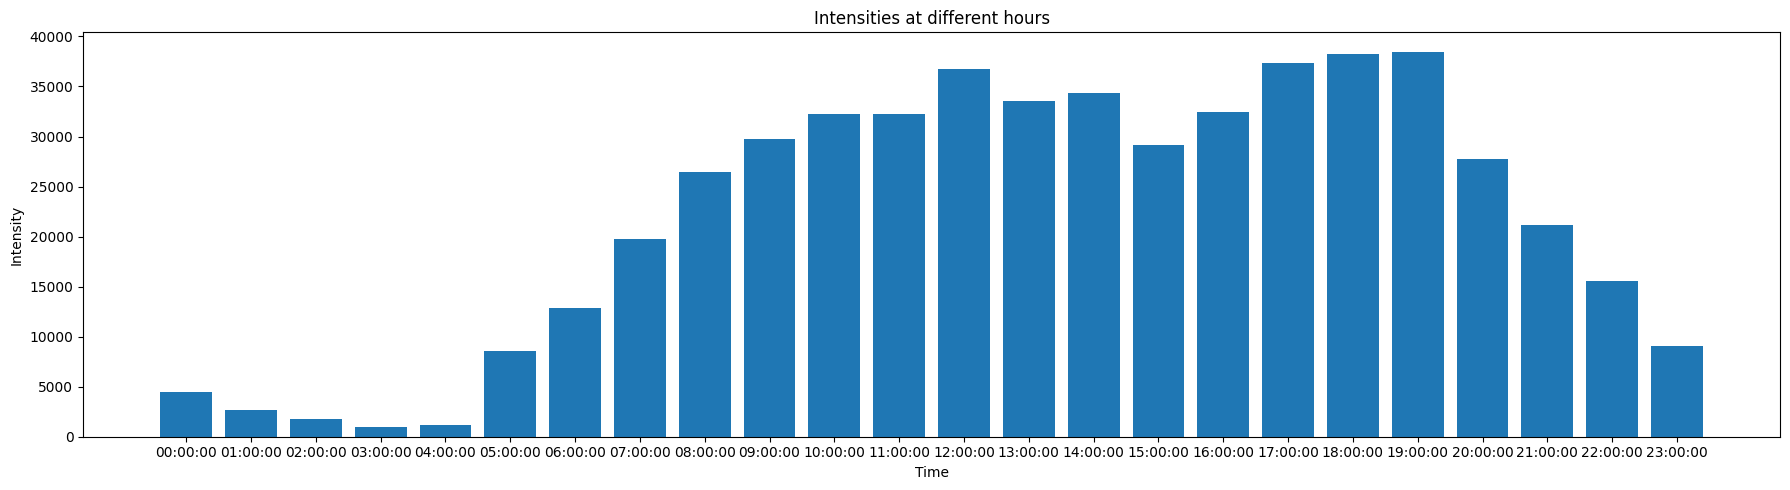

In [405]:
plt.figure(figsize = (18, 5))
plt.bar(time, intensities)
plt.title("Intensities at different hours")
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.tight_layout()

Intensities increasing from 5 am to 12 am and declining till 3 pm then again increasing from 4 pm and reaching maximum
intensity at 7 pm

*Recommendations to Bella Beat*

1. They can create an app that connects with bella beat devices that app is like a facebook and snapchat where thecompany      need to post different challenges like challenge on number of steps for different days like people have more steps on      weekends so there is no nee dof challenge their this mostly useful in week days as on monday which has least steps. If      they achieve the goals they get streaks like snapchat.

2. They need to set an automatic notification based on the users data like if the people have sleep less than 7 hours          device need to show some notification or vibration and If they continue to have less than 7 hours of sleep then            recommend them to go to doctor. Most people have high difference of time in bed and time asleep on tuesdays and            wednesdays the app need to send a notification that indicates to sleep if they are wathcing mobile phone on bed which      may be one cause for high difference of bed time and sleep time.

3. Sedentary minutes is negatively correlated with Minutes asleep. The app can also include challenges which can decrease 
   sedentary minutes which results in increase of sleep.